# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
#!pip install autogluon --no-cache-dir
!pip uninstall -y numpy scipy
!pip install numpy==1.23.5 scipy==1.9.3
!pip install autogluon==0.8.2

# Without --no-cache-dir, smaller aws instances may have trouble installing

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: scipy 1.9.3
Uninstalling scipy-1.9.3:
  Successfully uninstalled scipy-1.9.3
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scipy]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.3.1 requires numpy<2.3.0,>=1.2

ERROR: Ignored the following yanked versions: 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.0.9, 0.0.10, 0.0.11, 0.0.12, 0.0.13, 0.0.14, 0.0.15
ERROR: Ignored the following versions that require a different python version: 0.1.0 Requires-Python >=3.6, <3.9; 0.1.0b20210207 Requires-Python >=3.6, <3.8; 0.1.0b20210208 Requires-Python >=3.6, <3.8; 0.1.0b20210209 Requires-Python >=3.6, <3.8; 0.1.0b20210210 Requires-Python >=3.6, <3.8; 0.1.0b20210211 Requires-Python >=3.6, <3.8; 0.1.0b20210212 Requires-Python >=3.6, <3.8; 0.1.0b20210213 Requires-Python >=3.6, <3.8; 0.1.0b20210214 Requires-Python >=3.6, <3.8; 0.1.0b20210215 Requires-Python >=3.6, <3.8; 0.1.0b20210216 Requires-Python >=3.6, <3.8; 0.1.0b20210217 Requires-Python >=3.6, <3.8; 0.1.0b20210218 Requires-Python >=3.6, <3.8; 0.1.0b20210219 Requires-Python >=3.6, <3.8; 0.1.0b20210220 Requires-Python >=3.6, <3.8; 0.1.0b20210221 Requires-Python >=3.6, <3.8; 0.1.0b20210222 Requires-Python >=3.6, <3.8; 0.1.0b20210223 Requires-Python >=

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "hanfouriayoub"
kaggle_key = "e9459022bd0ea33fac8dbdc2088e1fd6"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/content/train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
predictor = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                                       presets='best_quality',
                                                                                       time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20250525_194140"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.50 GB / 12.67 GB (90.8%)
Disk Space Avail:   65.85 GB / 107.72 GB (61.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=10785) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=10961) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=11012) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=11012) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=11012) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=11012) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=11078) [2000]	valid_set's rmse: 134.443 [repeated 3x across cluster]


(_ray_fit pid=11012) 	Ran out of time, early stopping on iteration 8763. Best iteration is:
(_ray_fit pid=11012) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=11078) [5000]	valid_set's rmse: 132.706 [repeated 6x across cluster]
(_ray_fit pid=11078) [9000]	valid_set's rmse: 132.422 [repeated 4x across cluster]
(_ray_fit pid=11212) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=11212) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=11212) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=11212) [4000]	valid_set's rmse: 135.344
(_ray_fit pid=11212) [5000]	valid_set's rmse: 135.358
(_ray_fit pid=11285) [1000]	valid_set's rmse: 139.958
(_ray_fit pid=11212) [6000]	valid_set's rmse: 135.139
(_ray_fit pid=11212) [8000]	valid_set's rmse: 135.261 [repeated 4x across cluster]


(_dystack pid=10604) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10604) 	81.54s	 = Training   runtime
(_dystack pid=10604) 	15.88s	 = Validation runtime
(_dystack pid=10604) Fitting model: LightGBM_BAG_L1 ... Training model for up to 0.75s of the 47.56s of remaining time.
(_dystack pid=10604) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
(_ray_fit pid=11409) 	Ran out of time, early stopping on iteration 1. Best iteration is:
(_ray_fit pid=11409) 	[1]	valid_set's rmse: 176.861
(_ray_fit pid=11508) 	Ran out of time, early stopping on iteration 1. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=11508) 	[1]	valid_set's rmse: 179.046 [repeated 2x across cluster]
(_ray_fit pid=11600) 	Ran out of time, early stopping on iteration 1. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=11600) 	[1]	valid_set's rmse: 173.454 [repeated 2x across cluster]
(_ra

(_ray_fit pid=11793) [1000]	valid_set's rmse: 71.3286 [repeated 3x across cluster]
(_ray_fit pid=11900) [1000]	valid_set's rmse: 78.0568 [repeated 2x across cluster]


(_ray_fit pid=11900) 	Ran out of time, early stopping on iteration 1357. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=11900) 	[1174]	valid_set's rmse: 77.9802 [repeated 2x across cluster]
(_ray_fit pid=12017) 	Ran out of time, early stopping on iteration 870. Best iteration is:
(_ray_fit pid=12017) 	[868]	valid_set's rmse: 76.0798


(_ray_fit pid=12129) [1000]	valid_set's rmse: 72.4536 [repeated 2x across cluster]


(_ray_fit pid=12130) 	Ran out of time, early stopping on iteration 1066. Best iteration is:
(_ray_fit pid=12130) 	[1066]	valid_set's rmse: 75.8436
(_dystack pid=10604) 	-74.095	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10604) 	40.52s	 = Training   runtime
(_dystack pid=10604) 	1.9s	 = Validation runtime
(_dystack pid=10604) Fitting model: WeightedEnsemble_L3 ... Training model for up to 140.38s of the -31.97s of remaining time.
(_dystack pid=10604) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 1.0}
(_dystack pid=10604) 	-74.095	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10604) 	0.02s	 = Training   runtime
(_dystack pid=10604) 	0.0s	 = Validation runtime
(_dystack pid=10604) AutoGluon training complete, total runtime = 172.47s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 67.8 rows/s (1210 batch size)
(_dystack pid=10604) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-202505

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -54.963029  root_mean_squared_error      28.687021  360.936916                0.001216           0.055718            3       True         11
1          LightGBM_BAG_L2  -55.028266  root_mean_squared_error      23.123083  292.297242                0.719277          44.469330            2       True         10
2        LightGBMXT_BAG_L2  -60.403261  root_mean_squared_error      27.966528  316.411869                5.562723          68.583956            2       True          9
3    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.056445    0.033185                0.056445           0.033185            1       True          2
4      WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.057286    0.053847   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.0280891130569,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.403

### Create predictions from test dataset

In [35]:
predictions = predictor.predict(test)
predictions.head()

,count
0,36.678928
1,45.095150
2,49.183723
3,52.522114
4,53.749619


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [36]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,99.761024
std,90.037384
min,-2.180442
25%,16.375790
50%,63.370960
75%,172.569000
max,371.347656


In [37]:
# How many negative values do we have?
negative_values = (predictions < 0).sum()
negative_values

3

In [38]:
# Set them to zero
predictions = predictions.apply(lambda x: max(0, x))

In [39]:
predictions.describe()

,count
count,6493.000000
mean,99.761731
std,90.036600
min,0.000000
25%,16.375790
50%,63.370960
75%,172.569000
max,371.347656


In [40]:
negative_values = (predictions < 0).sum()
negative_values

0

### Set predictions to submission dataframe, save, and submit

In [41]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [42]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 243k/243k [00:00<00:00, 1.25MB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [43]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv               2025-05-25 20:04:19.813000  first raw submission  SubmissionStatus.COMPLETE  1.84461      1.84461       
submission_new_features.csv  2025-05-24 23:01:04.090000  new features          SubmissionStatus.COMPLETE  0.62275      0.62275       
submission.csv               2025-05-24 22:24:04.610000  first raw submission  SubmissionStatus.COMPLETE  1.80139      1.80139       


#### Initial score of `1.84461`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

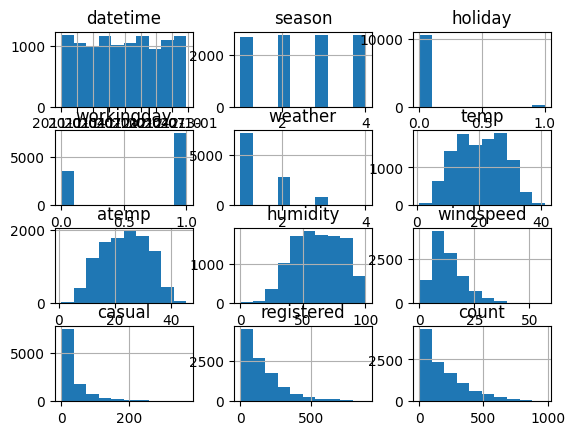

In [44]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [45]:
# create a new feature
train["day"] = train["datetime"].dt.day
test["day"] = test["datetime"].dt.day

train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [46]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [47]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>]], dtype=object)

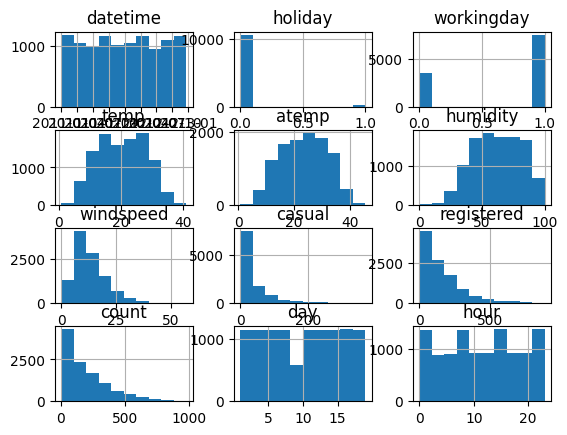

In [48]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [49]:
predictor_new_features = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                                       presets='best_quality',
                                                                                       time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20250525_200622"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.28 GB / 12.67 GB (81.1%)
Disk Space Avail:   65.11 GB / 107.72 GB (60.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [50]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.341406  root_mean_squared_error      52.383097  402.257555                0.000777           0.028061            3       True         11
1          LightGBM_BAG_L2  -30.653788  root_mean_squared_error      48.719697  299.042500                0.602737          41.297655            2       True          9
2        LightGBMXT_BAG_L2  -31.019088  root_mean_squared_error      51.015609  313.075374                2.898649          55.330529            2       True          8
3   RandomForestMSE_BAG_L2  -31.914568  root_mean_squared_error      48.880935  305.601310                0.763975          47.856465            2       True         10
4      WeightedEnsemble_L2  -32.352488  root_mean_squared_error      47.917175  221.792463   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.407385036791474,
  'LightGBM_BAG_L1': -33.91939485344323,
  'RandomForestMSE_BAG_L1': -38.43471378787749,
  'CatBoost_BAG_L1': -44.04153665242789,
  'WeightedEnsemble_L2': -32.352487955975725,
  'LightGBMXT_BAG_L2': -31.019088261444615,
  'LightGBM_BAG_L2': -30.65378

In [51]:
prediction_new_features = predictor_new_features.predict(test)

In [53]:
prediction_new_features.head()

,count
0,15.470271
1,10.155424
2,9.634206
3,7.495638
4,6.689588


In [55]:
prediction_new_features.describe()

,count
count,6493.000000
mean,163.525208
std,144.123398
min,1.486443
25%,50.463375
50%,127.574341
75%,233.697006
max,814.984009


In [69]:
# Remember to set all negative values to zero
prediction_new_features = prediction_new_features.apply(lambda x: max(0, x))

In [70]:
# Same submitting predictions
submission_new_features = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = prediction_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [71]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 243k/243k [00:00<00:00, 1.34MB/s]
Successfully submitted to Bike Sharing Demand

In [72]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-25 21:27:43.857000  new features                       SubmissionStatus.COMPLETE  0.62687      0.62687       
submission_new_hpo1.csv      2025-05-25 21:26:35.283000  new features with hyperparameters  SubmissionStatus.ERROR                                
submission_new_features.csv  2025-05-25 20:20:26.823000  new features                       SubmissionStatus.COMPLETE  0.62687      0.62687       
submission.csv               2025-05-25 20:04:19.813000  first raw submission               SubmissionStatus.COMPLETE  1.84461      1.84461       


#### New Score of `0.62687`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

***hpo1***

In [60]:
hyperparameter = {
    "GBM": {},
    "XGB": {"learning_rate": 0.05, "n_estimators": 300},
}

In [61]:
predictor_new_hpo1 = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                                       presets='best_quality',
                                                                                       time_limit=600,
                                                                                      hyperparameters=hyperparameter)

No path specified. Models will be saved in: "AutogluonModels/ag-20250525_211725"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.17 GB / 12.67 GB (80.2%)
Disk Space Avail:   64.39 GB / 107.72 GB (59.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [62]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -33.570582  root_mean_squared_error       9.540140  141.076014                0.000984           0.028352            3       True          6
1  WeightedEnsemble_L2 -33.582707  root_mean_squared_error       9.194669   83.638675                0.000696           0.011449            2       True          3
2      LightGBM_BAG_L1 -33.919395  root_mean_squared_error       8.661996   59.324811                8.661996          59.324811            1       True          1
3      LightGBM_BAG_L2 -34.331817  root_mean_squared_error       9.326751  118.059569                0.132777          34.432343            2       True          4
4       XGBoost_BAG_L2 -34.753266  root_mean_squared_error       9.406379  106.615319                0.212406         

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -33.91939485344323,
  'XGBoost_BAG_L1': -36.89511521602944,
  'WeightedEnsemble_L2': -33.5827073552491,
  'LightGBM_BAG_L2': -34.331817150153974,
  'XGBoost_BAG_L2': -34.75326614546539,
  'WeightedEnsemble_L3': -33.57058177643249},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'XGBoost_BAG_L1': ['XGBoost_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'LightGBM_BAG_L2': ['LightGBM_BAG_L2'],
  'XGBoost_BAG_L2': ['XGBoost_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBM_BAG_L1': 59.32481074333191,
  'XGBoost_BAG_L1': 24.30241537

In [63]:
prediction_new_hpo1 = predictor_new_hpo1.predict(test)
prediction_new_hpo1.describe()

,count
count,6493.000000
mean,192.108032
std,174.293182
min,-12.899035
25%,45.883884
50%,151.849442
75%,284.746094
max,899.050049


In [74]:
# Remember to set all negative values to zero
prediction_new_hpo1 = prediction_new_hpo1.apply(lambda x: max(0, x))

In [75]:
# Same submitting predictions
submission_new_hpo1 = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo1["count"] = prediction_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [76]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters"

100% 241k/241k [00:00<00:00, 1.44MB/s]
Successfully submitted to Bike Sharing Demand

In [77]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo1.csv      2025-05-25 21:28:51.337000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51743      0.51743       
submission_new_features.csv  2025-05-25 21:27:43.857000  new features                       SubmissionStatus.COMPLETE  0.62687      0.62687       
submission_new_hpo1.csv      2025-05-25 21:26:35.283000  new features with hyperparameters  SubmissionStatus.ERROR                                
submission_new_features.csv  2025-05-25 20:20:26.823000  new features                       SubmissionStatus.COMPLETE  0.62687      0.62687       


#### New Score of `0.51743`

***hpo2***

In [88]:
predictor_new_hpo2 = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                                       presets='best_quality',
                                                                                       time_limit=600,
                                                                                        num_bag_folds=5,num_bag_sets=10, num_stack_levels=1)

No path specified. Models will be saved in: "AutogluonModels/ag-20250525_214222"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.10 GB / 12.67 GB (79.7%)
Disk Space Avail:   64.33 GB / 107.72 GB (59.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=10
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will b

In [89]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L1  -34.664609  root_mean_squared_error      71.257277  377.295921               71.257277         377.295921            1       True          3
1    WeightedEnsemble_L3  -34.664609  root_mean_squared_error      71.258216  377.320773                0.000939           0.024853            3       True          5
2    WeightedEnsemble_L2  -34.664609  root_mean_squared_error      71.258373  377.315615                0.001096           0.019694            2       True          4
3  KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.079364    0.052044                0.079364           0.052044            1       True          2
4  KNeighborsUnif_BAG_L1 -101.546199  root_mean_squared_error       0.066477    0.046187               

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.66460865755839,
  'WeightedEnsemble_L2': -34.66460865755839,
  'WeightedEnsemble_L3': -34.66460865755839},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 0.04618668556213379,
  'KNeighborsDist_BAG_L1': 0.05204415321350098,
  'LightGBMXT_BAG_L1': 377.29592061042786,
  'Weig

In [90]:
prediction_new_hpo2 = predictor_new_hpo2.predict(test)
prediction_new_hpo2.describe()

,count
count,6493.000000
mean,190.402374
std,172.421829
min,-23.280054
25%,47.020546
50%,150.680695
75%,283.731567
max,883.136353


In [91]:
# Remember to set all negative values to zero
prediction_new_hpo2 = prediction_new_hpo2.apply(lambda x: max(0, x))
# Same submitting predictions
submission_new_hpo2 = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo2["count"] = prediction_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters"

100% 240k/240k [00:00<00:00, 1.40MB/s]
Successfully submitted to Bike Sharing Demand

In [92]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo2.csv      2025-05-25 21:56:55.053000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.58143      0.58143       
submission_new_hpo1.csv      2025-05-25 21:28:51.337000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51743      0.51743       
submission_new_features.csv  2025-05-25 21:27:43.857000  new features                       SubmissionStatus.COMPLETE  0.62687      0.62687       
submission_new_hpo1.csv      2025-05-25 21:26:35.283000  new features with hyperparameters  SubmissionStatus.ERROR                                


#### New Score of `0.58143`

***hpo3***

In [93]:
predictor_new_hpo2 = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                                       presets='best_quality',
                                                                                       time_limit=600,
                                                                                       auto_stack = True)

No path specified. Models will be saved in: "AutogluonModels/ag-20250525_215959"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.12 GB / 12.67 GB (79.9%)
Disk Space Avail:   64.09 GB / 107.72 GB (59.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [94]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -30.347914  root_mean_squared_error      49.534916  339.757001                0.000921           0.036981            3       True         10
1         LightGBM_BAG_L2  -30.662393  root_mean_squared_error      46.504885  287.690058                0.537093          40.780851            2       True          9
2       LightGBMXT_BAG_L2  -30.971347  root_mean_squared_error      48.996902  298.939168                3.029110          52.029961            2       True          8
3     WeightedEnsemble_L2  -32.352488  root_mean_squared_error      45.753295  211.158404                0.001662           0.036448            2       True          7
4         LightGBM_BAG_L1  -33.919395  root_mean_squared_error       6.267604   59.851475         

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.407385036791474,
  'LightGBM_BAG_L1': -33.91939485344323,
  'RandomForestMSE_BAG_L1': -38.43471378787749,
  'CatBoost_BAG_L1': -44.93177483023216,
  'WeightedEnsemble_L2': -32.352487955975725,
  'LightGBMXT_BAG_L2': -30.97134717959743,
  'LightGBM_BAG_L2': -30.66239347115343,
  'WeightedEnsemble_L3': -30.347913501893096}

In [95]:
prediction_new_hpo2 = predictor_new_hpo2.predict(test)
prediction_new_hpo2.describe()

,count
count,6493.000000
mean,162.682816
std,143.474243
min,1.059437
25%,50.050911
50%,126.043602
75%,231.234619
max,802.600830


In [96]:
# Remember to set all negative values to zero
prediction_new_hpo2 = prediction_new_hpo2.apply(lambda x: max(0, x))
# Same submitting predictions
submission_new_hpo2 = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo2["count"] = prediction_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters"

100% 243k/243k [00:00<00:00, 1.28MB/s]
Successfully submitted to Bike Sharing Demand

In [97]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo2.csv      2025-05-25 22:13:13.133000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.62708      0.62708       
submission_new_hpo2.csv      2025-05-25 21:56:55.053000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.58143      0.58143       
submission_new_hpo1.csv      2025-05-25 21:28:51.337000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51743      0.51743       
submission_new_features.csv  2025-05-25 21:27:43.857000  new features                       SubmissionStatus.COMPLETE  0.62687      0.62687       


#### New Score of `0.62708`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

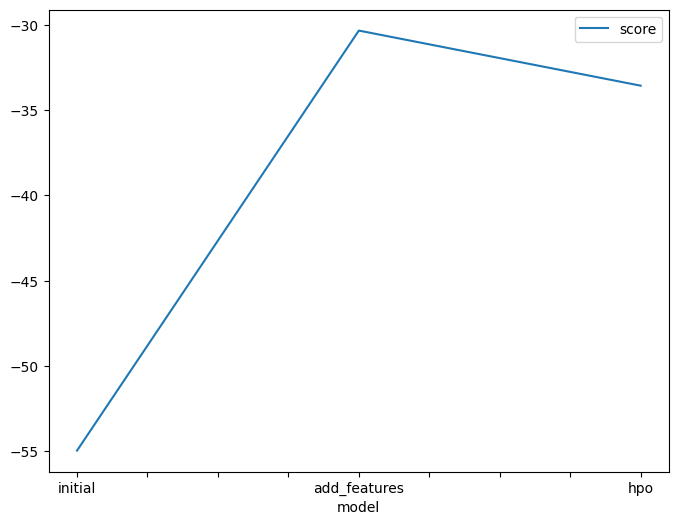

In [100]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-54.963029, -30.341406, -33.570582]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

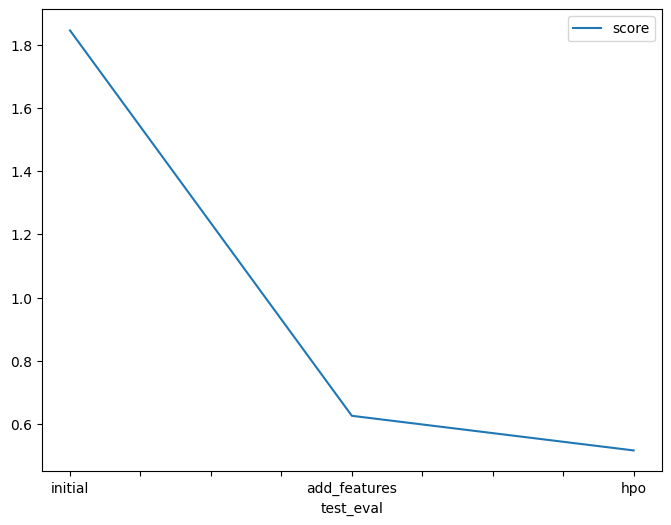

In [99]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.84461, 0.62687, 0.51743]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [102]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [None, None, "model type = 'GBM' , 'XGB'"],
    "hpo2": [None, None, "num_bag_folds=5,num_bag_sets=10, num_stack_levels=1"],
    "hpo3": [None, None, "auto_stack = True"],
    "score": [1.84461, 0.62687, 0.51743]
})

,model,hpo1,hpo2,hpo3,score
0,initial,None,None,None,1.84461
1,add_features,None,None,None,0.62687
2,hpo,"model type = 'GBM' , 'XGB'","num_bag_folds=5,num_bag_sets=10, num_stack_lev...",auto_stack = True,0.51743
